### **Data Overview:**
*   **battery_power**: Total energy a battery can store in one time measured in mAh
*   **blue**: Has bluetooth or not
*   **clock_speed:** speed at which microprocessor executes instructions
*   **dual_sim**: Has dual sim support or not
*   **fc**: Front Camera mega pixels
*   **four_g**: Has 4G or not
*   **int_memory**: Internal Memory in Gigabytes
*   **m_dep**: Mobile Depth in cm
*   **mobile_wt**: Weight of mobile phon
*   **n_cores**: Number of cores of processor
*   **pc**: 	Primary Camera mega pixels           
*   **px_height**: Screen 	Pixel Resolution hight by pixels  
*   **px_width**: Screen 	Pixel Resolution width by pixels     
*   **ram**: Ram Speed      
*   **sc_h**: Screen hight  in cm      
*   **sc_w**: Screen width   in cm     
*   **talk_time:**: Longest time that a single battery charge will last when you are   
*   **three_g:** Have 3g or not
*   **touch_screen:** Have touch Screen or not
*   **wifi:** Have wifi  or not       
*   **price_range:** the price range (our target)  

Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(2000, 21)

In [4]:
test.shape

(1000, 21)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Pre-Processing

Combine the train and test dataframes

In [6]:
df = pd.concat([train, test], ignore_index=True)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,996.0
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,NaN,997.0
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,NaN,998.0
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,999.0


In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'id'],
      dtype='object')

In [8]:
df.drop('id', axis=1, inplace=True)

In [9]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,NaN
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,NaN
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,NaN
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,NaN


In [11]:
df.isnull().sum()

battery_power       0
blue                0
clock_speed         0
dual_sim            0
fc                  0
four_g              0
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                  0
px_height           0
px_width            0
ram                 0
sc_h                0
sc_w                0
talk_time           0
three_g             0
touch_screen        0
wifi                0
price_range      1000
dtype: int64

Check for the Outliers using Visualization charts

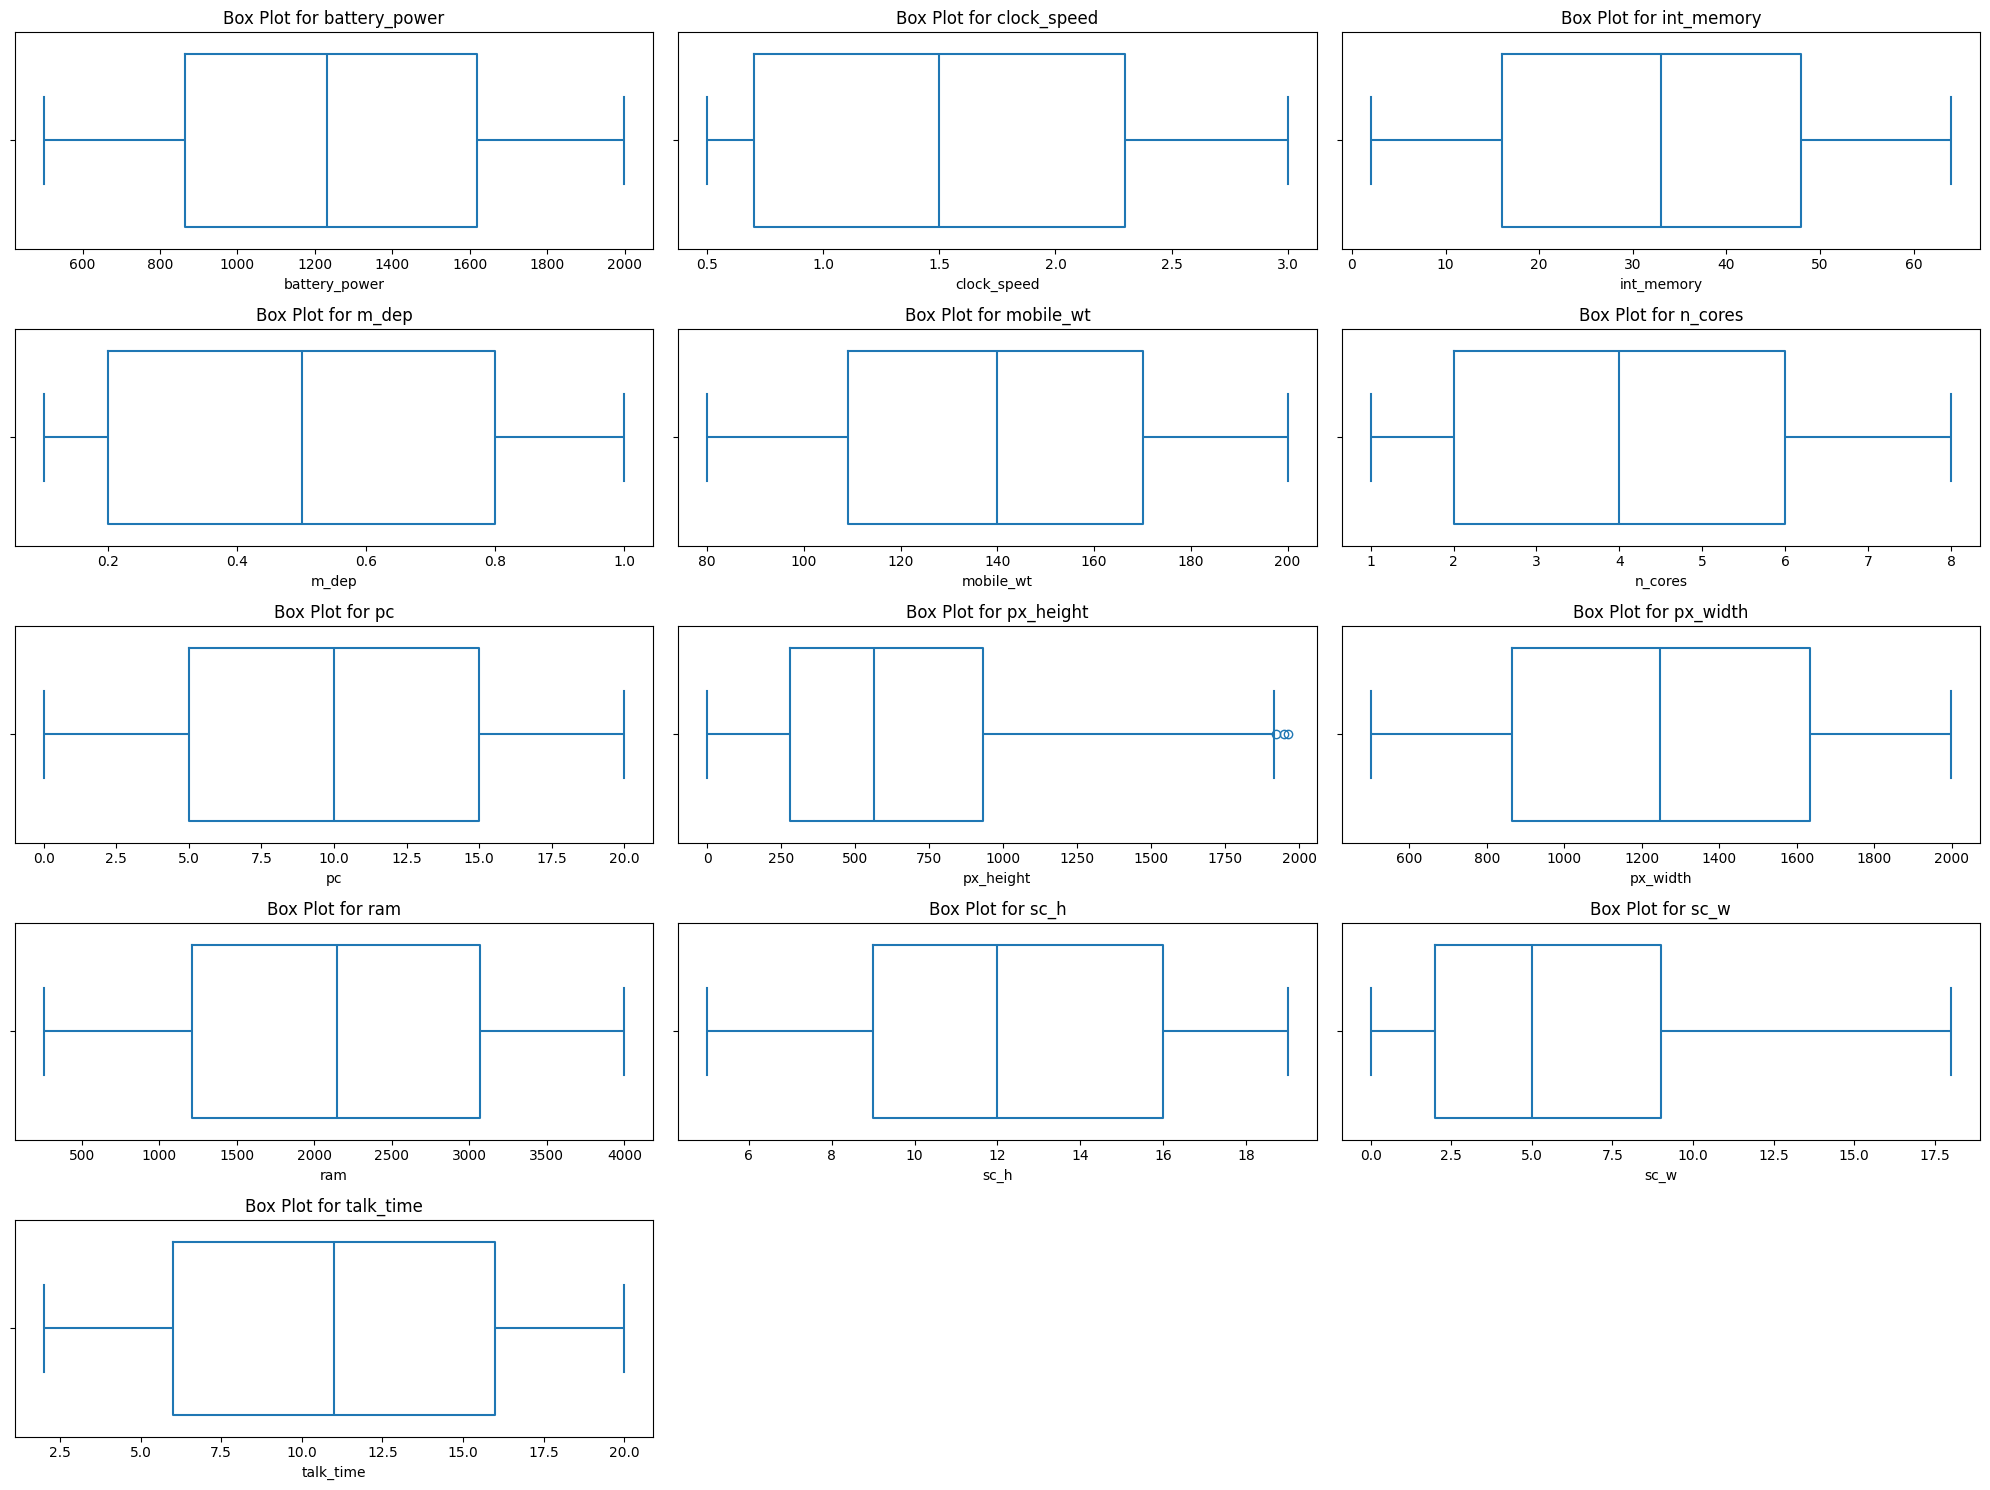

In [29]:
# Define the continuous features
continuous_features = ['battery_power', 'clock_speed', 'int_memory', 'm_dep',
                       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width',
                       'ram', 'sc_h', 'sc_w', 'talk_time']

# Number of rows and columns for the subplots
n_cols = 3
n_rows = len(continuous_features) // n_cols + (len(continuous_features) % n_cols > 0)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(continuous_features):
    sns.boxplot(data=df, x=df[feature], ax=axes[i], fill=False)
    axes[i].set_title(f'Box Plot for {feature}')

# Hide any unused subplots
for i in range(len(continuous_features), n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## EDA

Statistical Information for this Data

In [13]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2000.000000
mean,1241.849000,0.502000,1.528467,0.512000,4.404000,0.510000,32.581667,0.507000,140.003000,4.456333,...,639.112333,1247.601667,2129.141333,12.202667,5.616667,11.035667,0.759667,0.502000,0.507000,1.500000
std,437.063804,0.500079,0.820358,0.499939,4.383742,0.499983,18.152810,0.285969,35.213809,2.289361,...,440.202998,434.666168,1085.694231,4.251151,4.322494,5.474400,0.427357,0.500079,0.500034,1.118314
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,863.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,2.000000,...,277.750000,865.000000,1212.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1232.000000,1.000000,1.500000,1.000000,3.000000,1.000000,33.000000,0.500000,140.000000,4.000000,...,564.000000,1248.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1619.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,6.000000,...,932.500000,1634.000000,3065.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Compare the distribution of numeric features across different price_range categories.

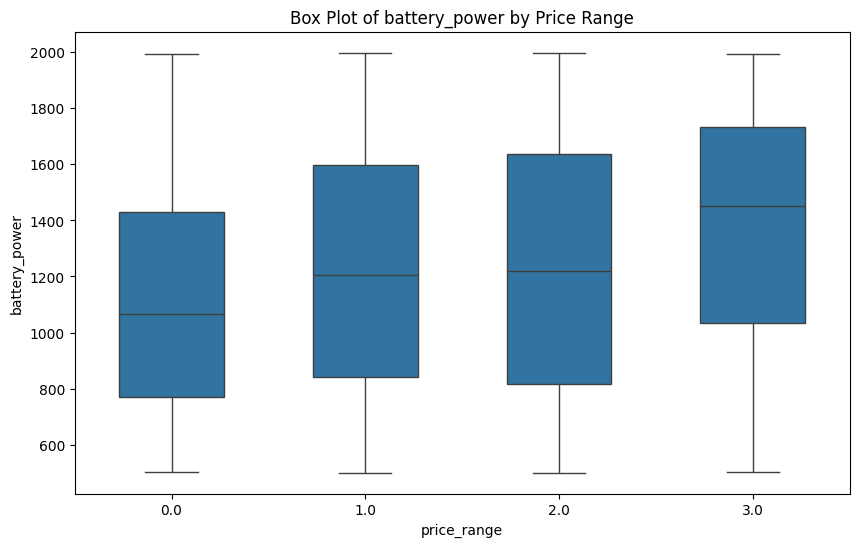

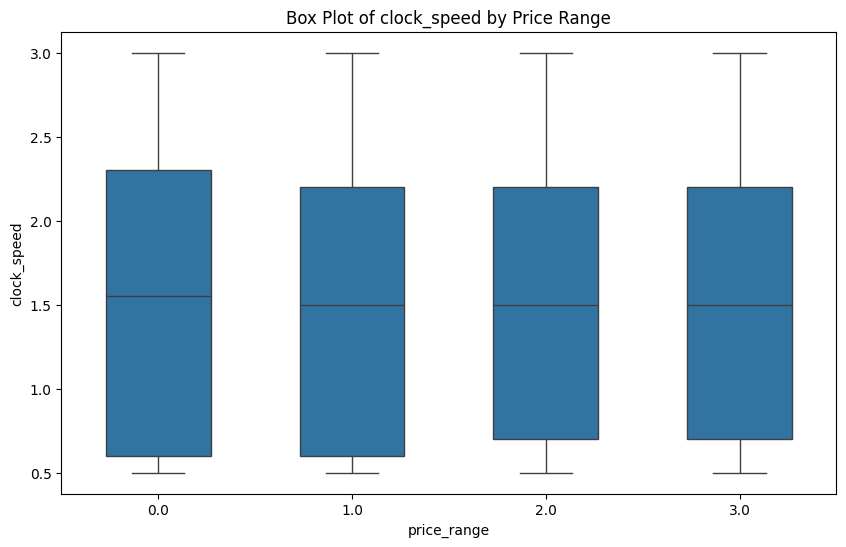

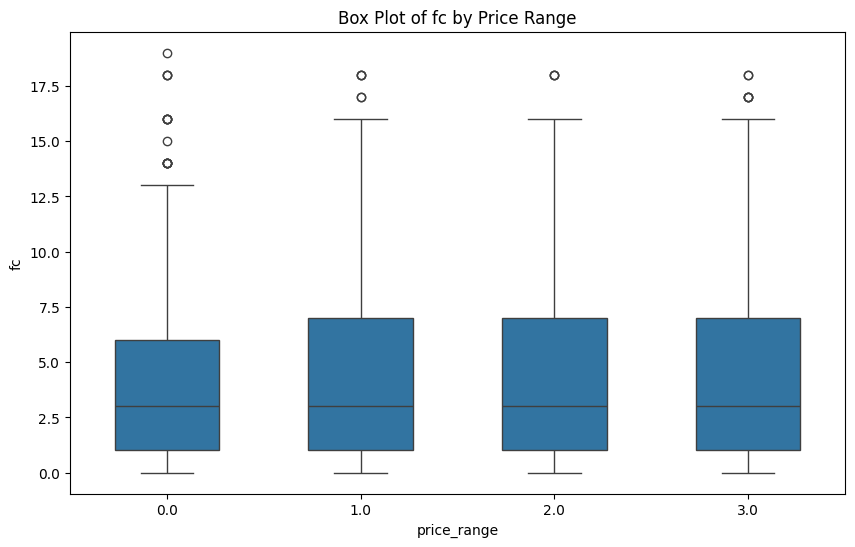

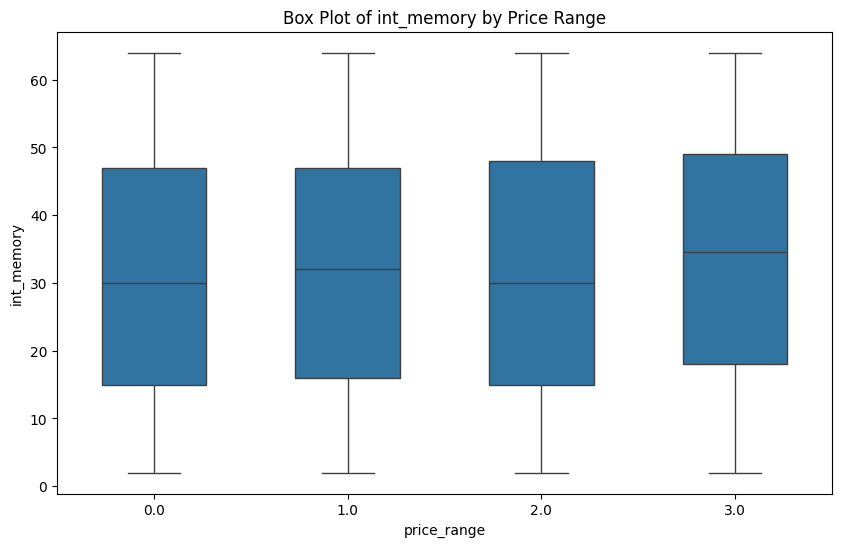

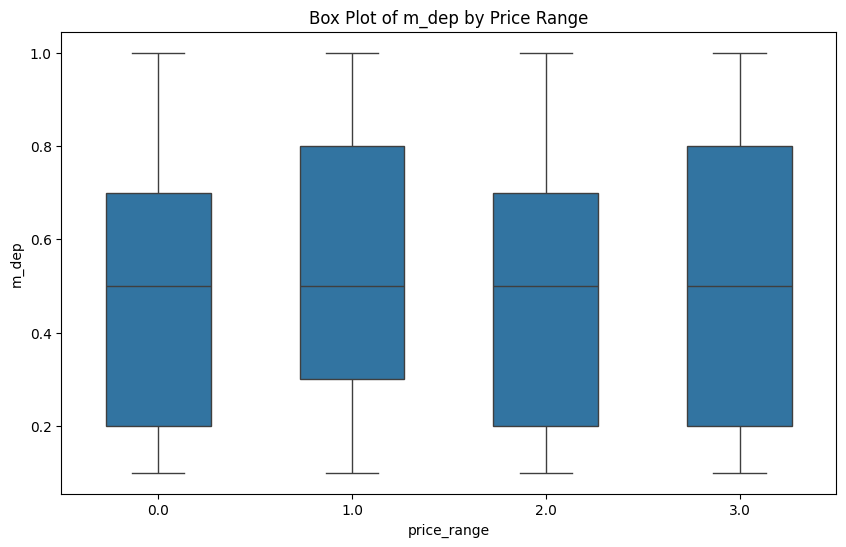

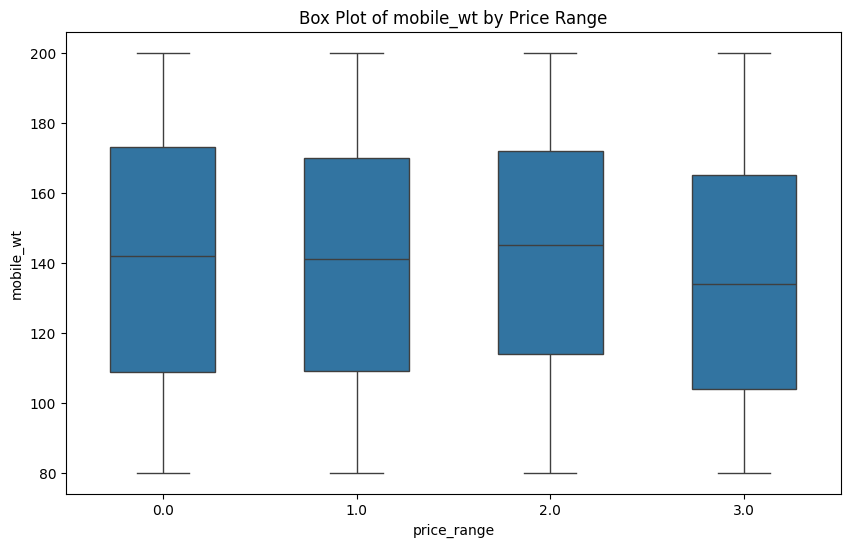

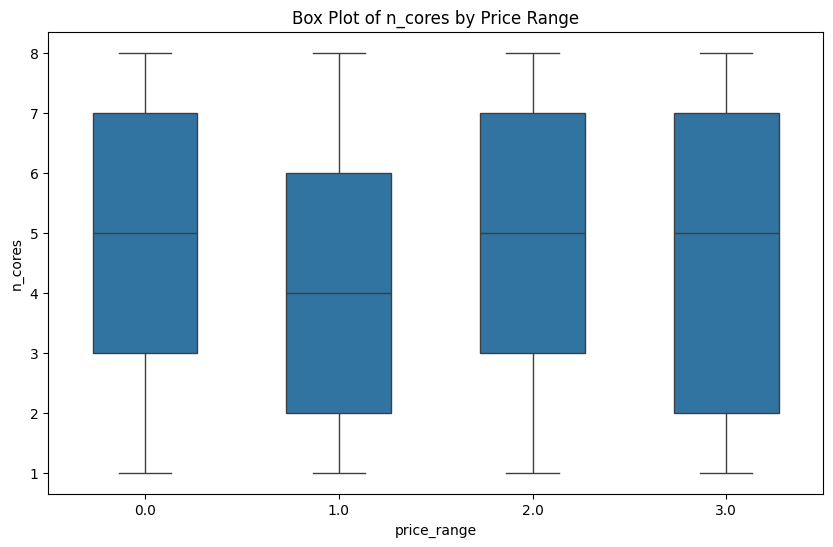

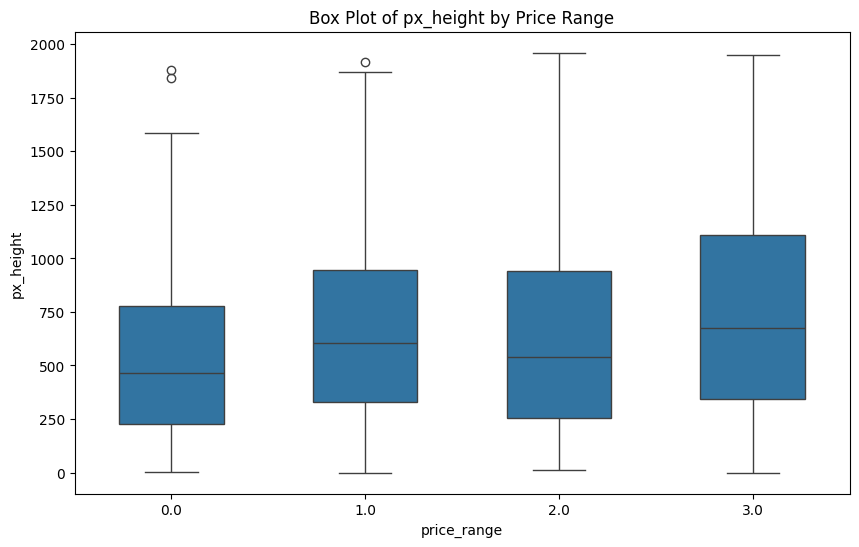

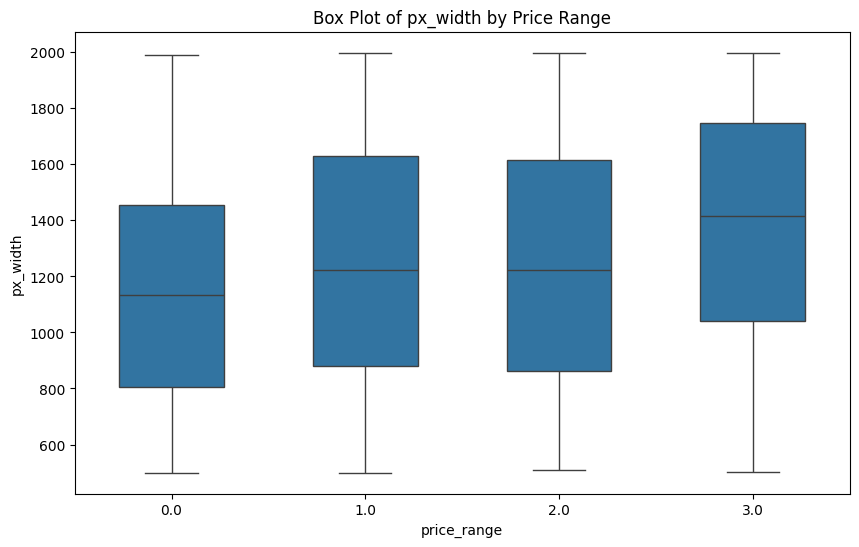

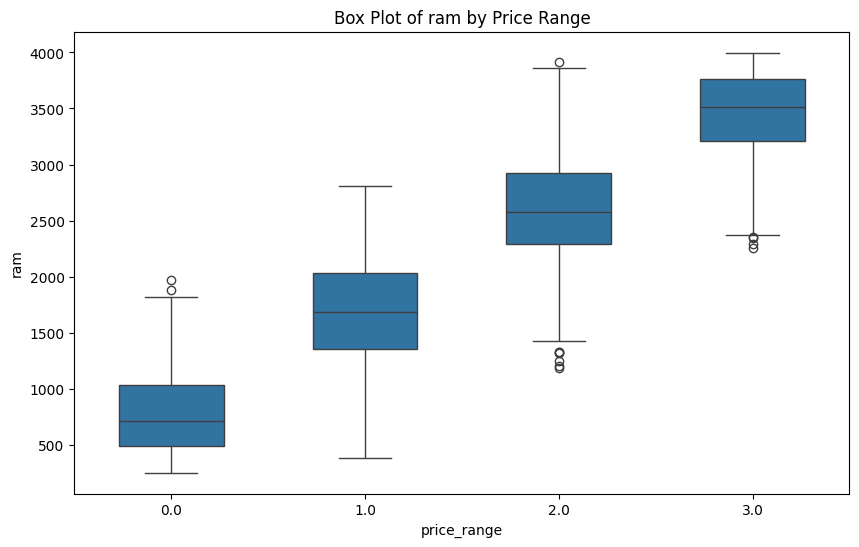

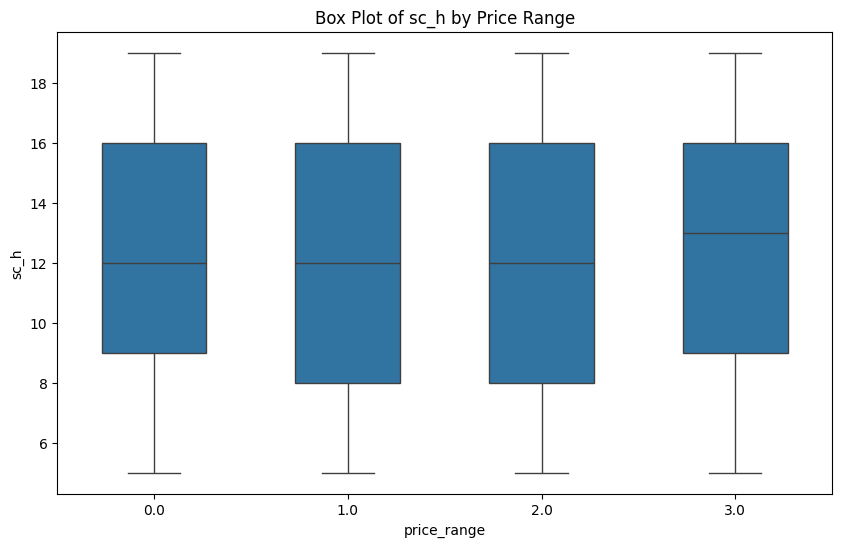

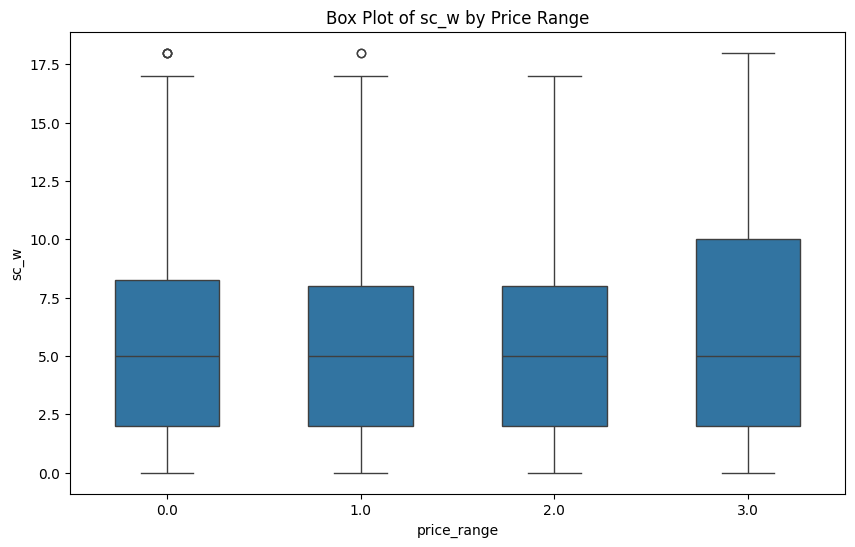

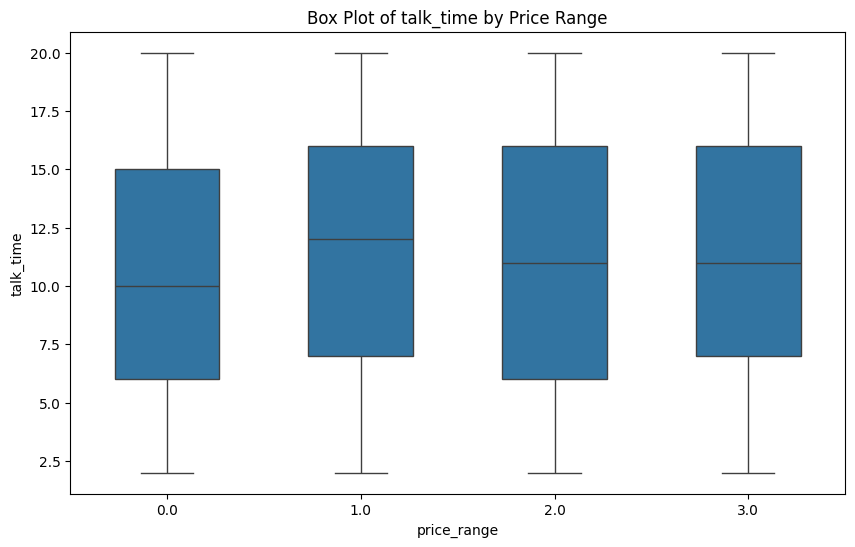

In [34]:
numeric_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                     'mobile_wt', 'n_cores', 'px_height', 'px_width', 'ram', 'sc_h',
                     'sc_w', 'talk_time']

for features in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='price_range', y=features, data=df, gap=0.1, width=0.6)
    plt.title(f'Box Plot of {features} by Price Range')
    plt.show()

Correlation Heatmap

<Axes: >

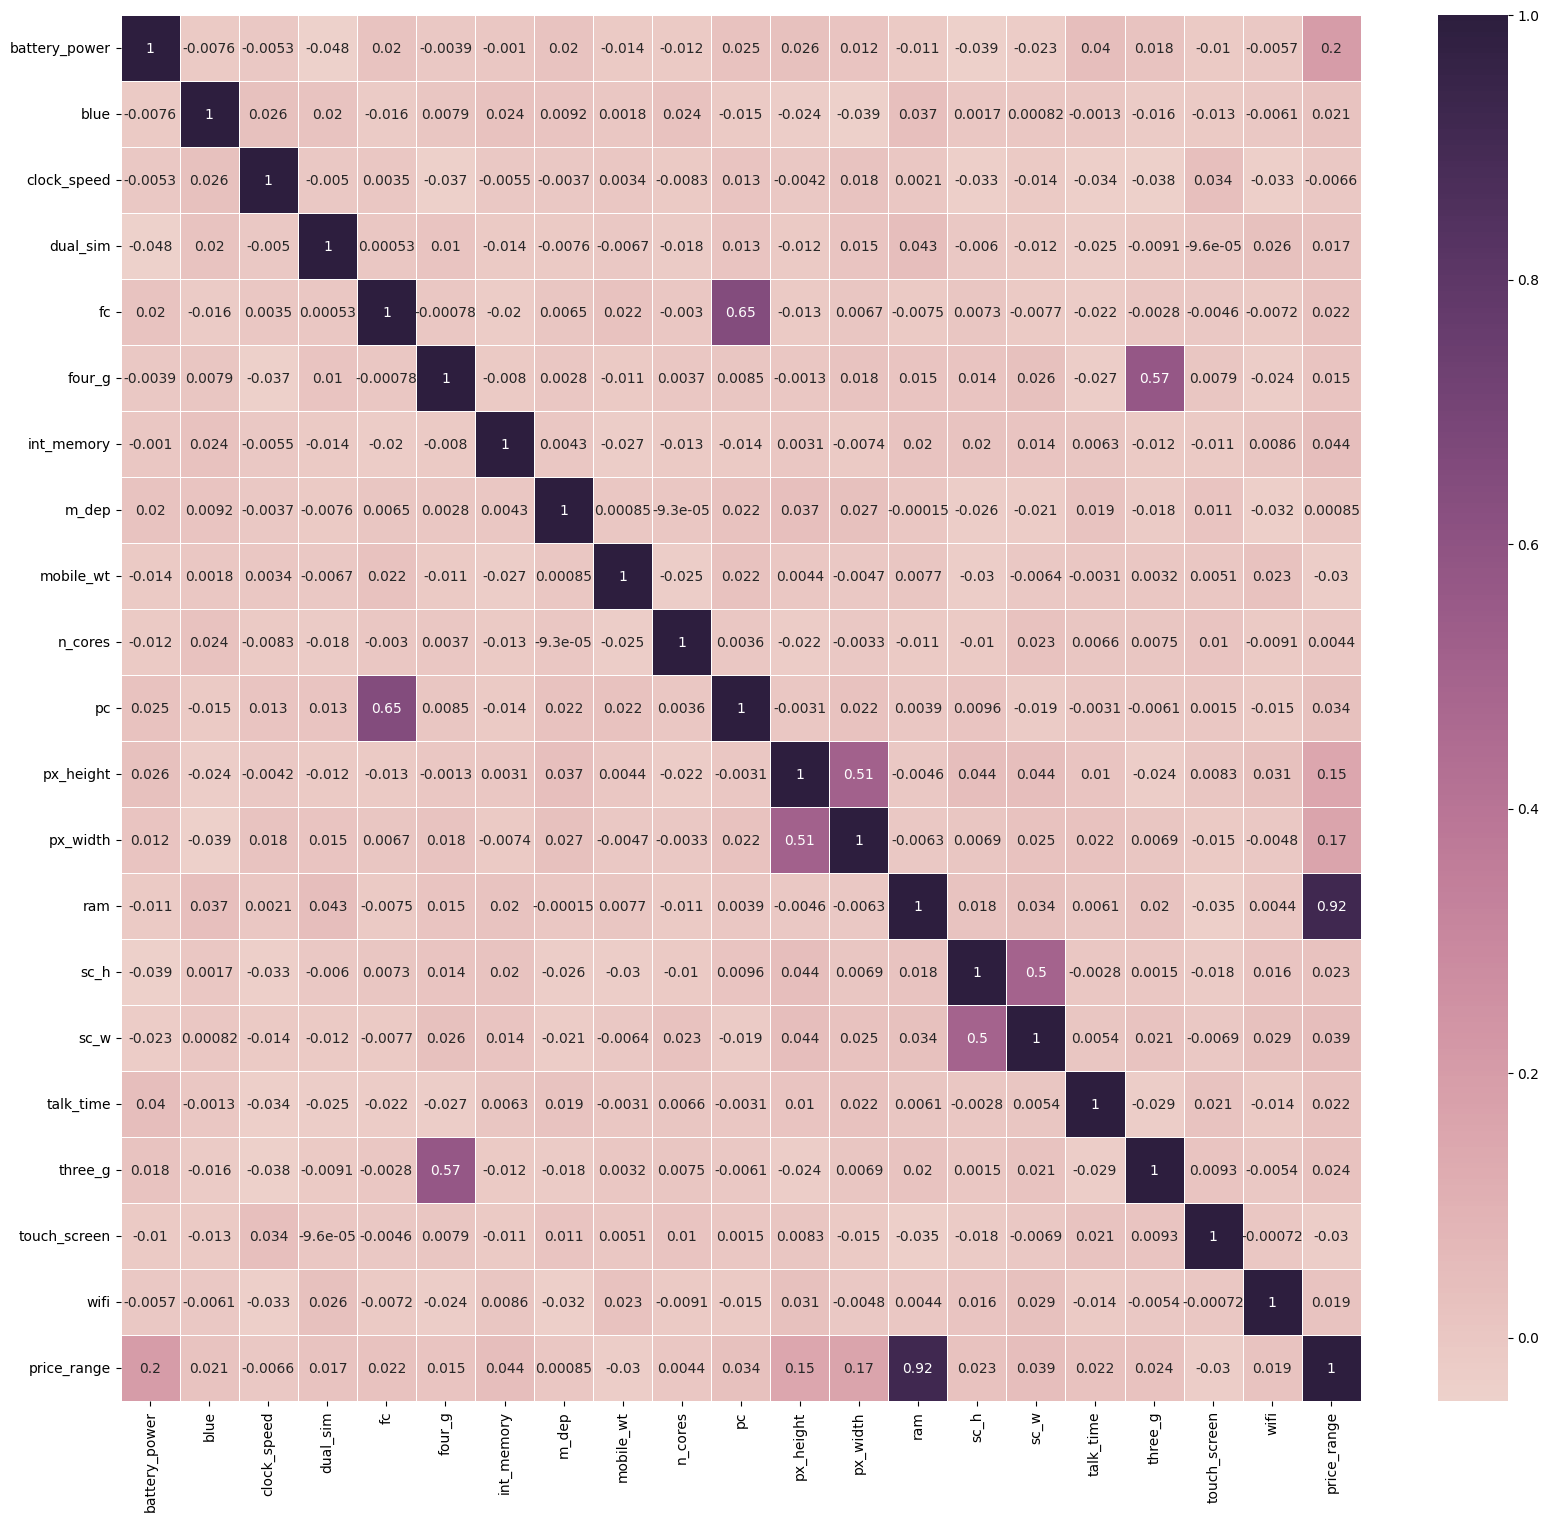

In [15]:
correlation = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation, annot=True, cmap=sns.cubehelix_palette(as_cmap=True),linewidths=.5)

# Univariate Analysis

We use histograms to anlayse the dataset

'talk_time'

<Figure size 1000x600 with 0 Axes>

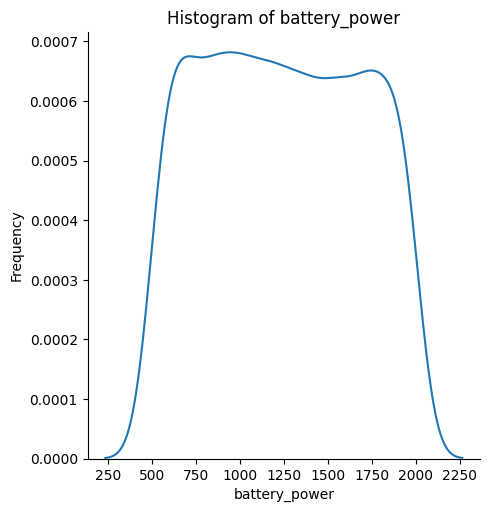

<Figure size 1000x600 with 0 Axes>

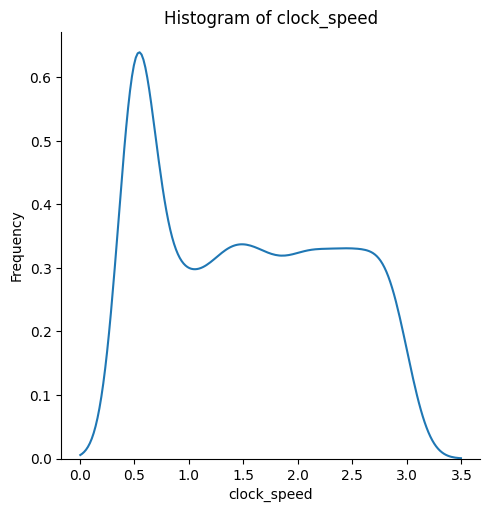

<Figure size 1000x600 with 0 Axes>

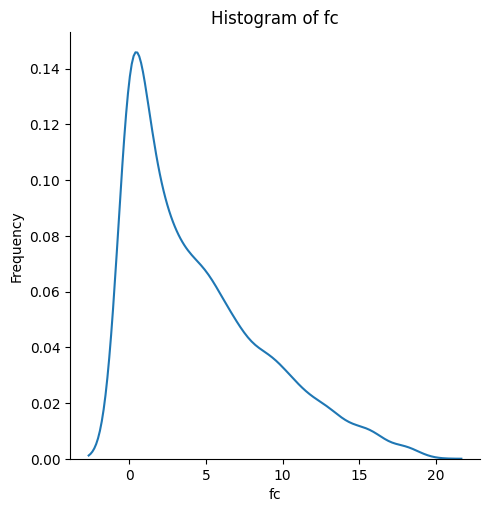

<Figure size 1000x600 with 0 Axes>

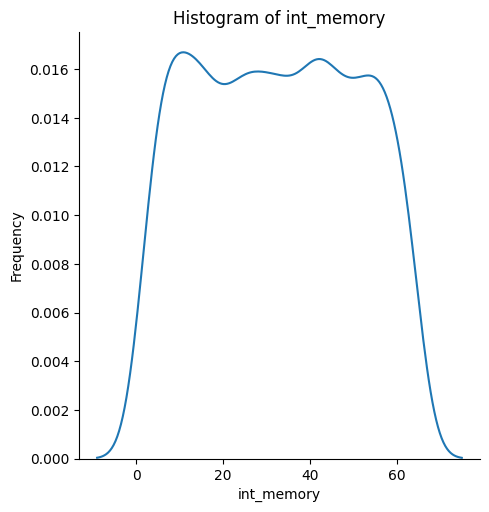

<Figure size 1000x600 with 0 Axes>

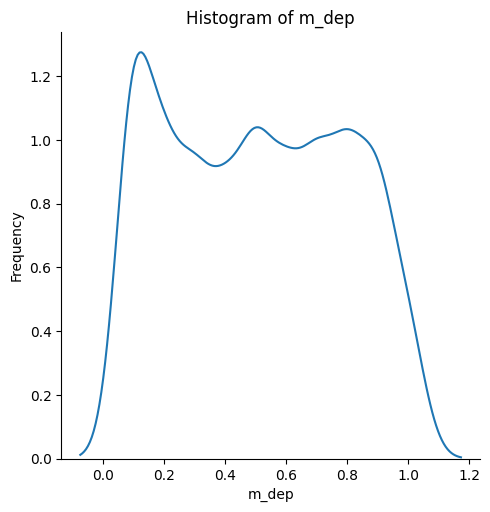

<Figure size 1000x600 with 0 Axes>

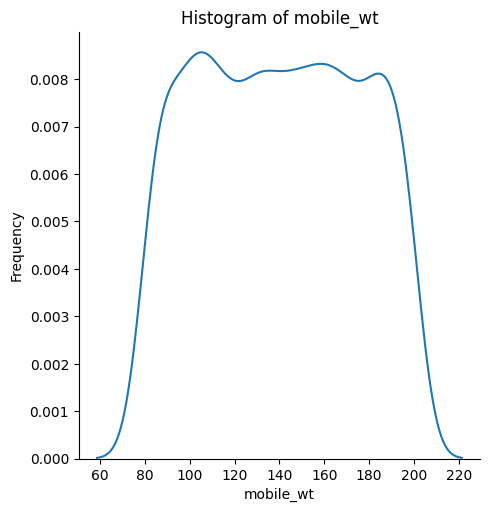

<Figure size 1000x600 with 0 Axes>

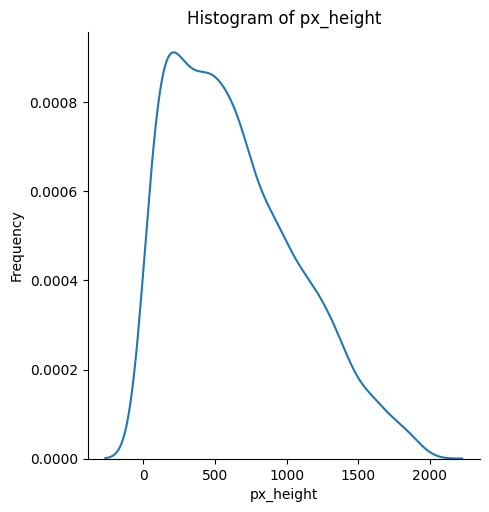

<Figure size 1000x600 with 0 Axes>

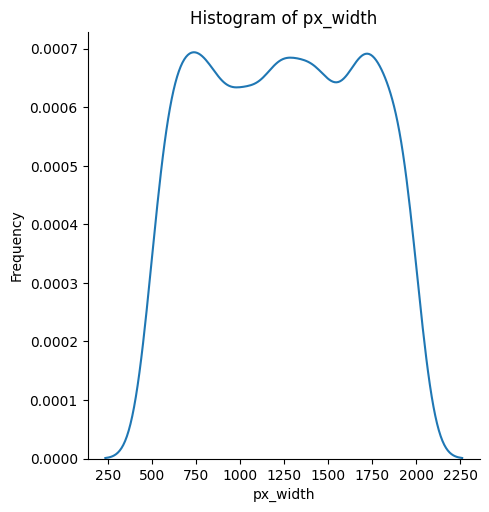

<Figure size 1000x600 with 0 Axes>

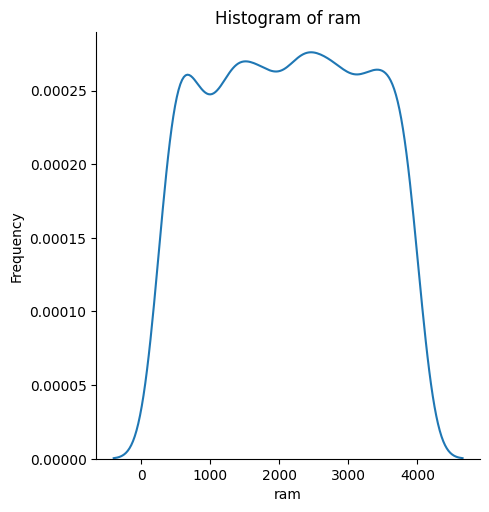

<Figure size 1000x600 with 0 Axes>

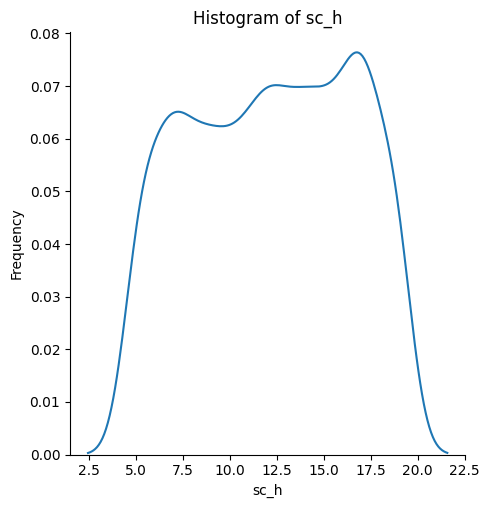

<Figure size 1000x600 with 0 Axes>

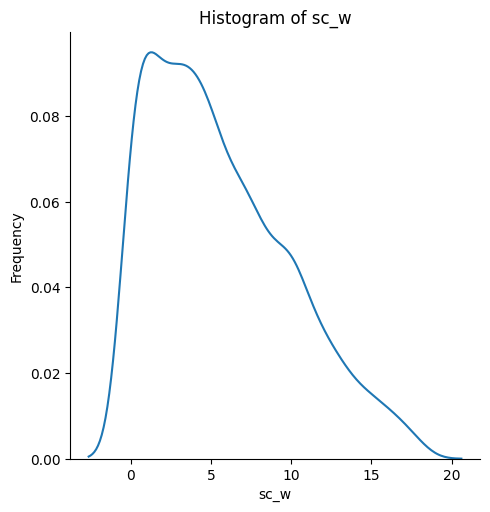

<Figure size 1000x600 with 0 Axes>

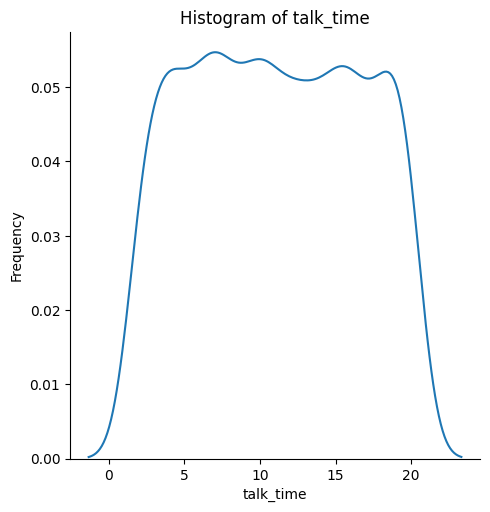

In [42]:
num_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                      'mobile_wt', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
                      'talk_time']

for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.displot(df[feature], kind='kde')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Categorical Visulaization

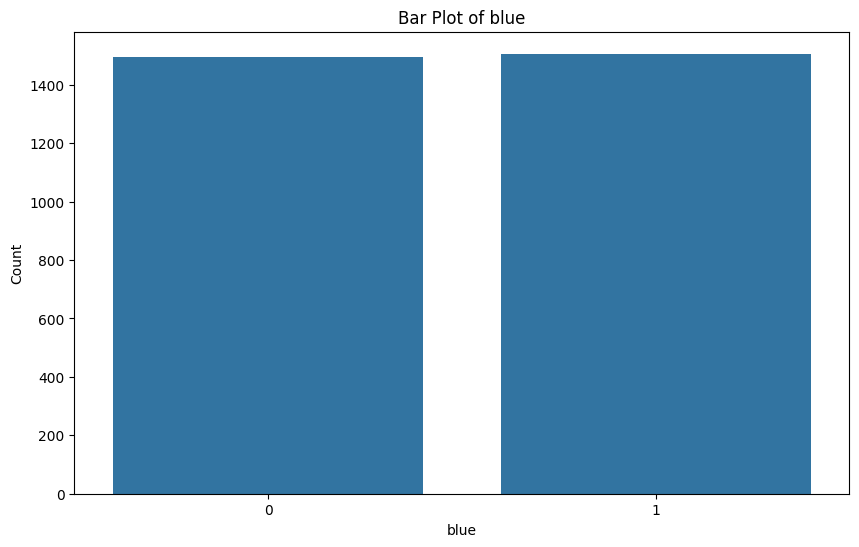

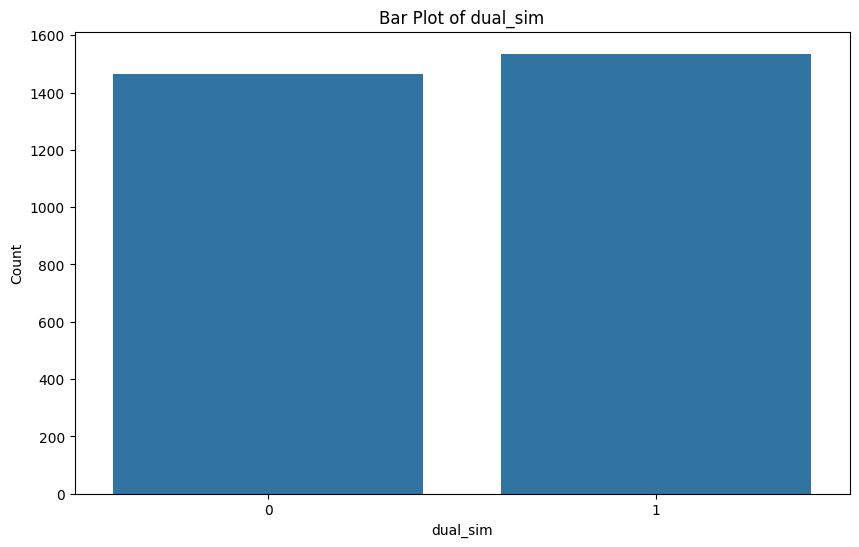

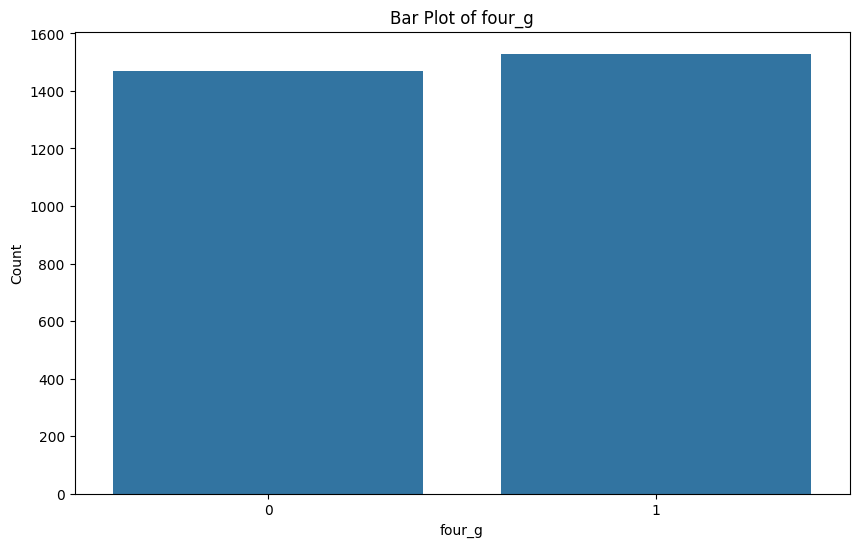

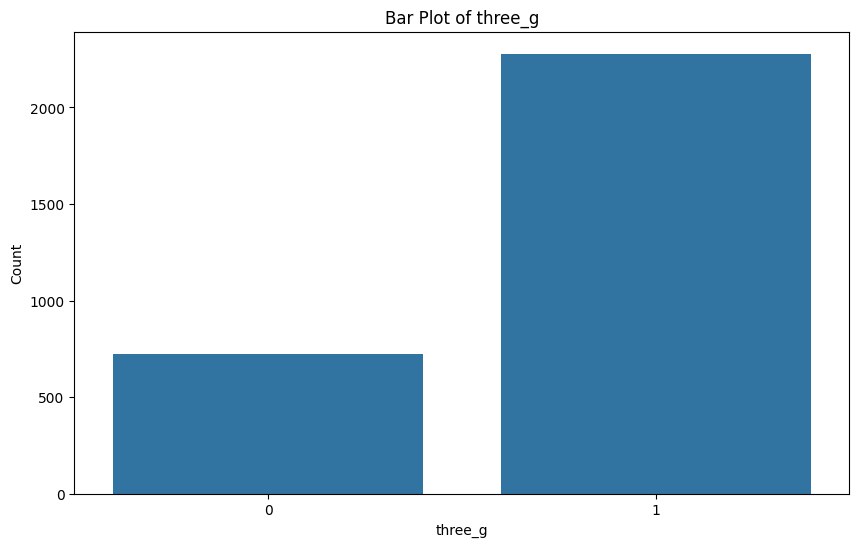

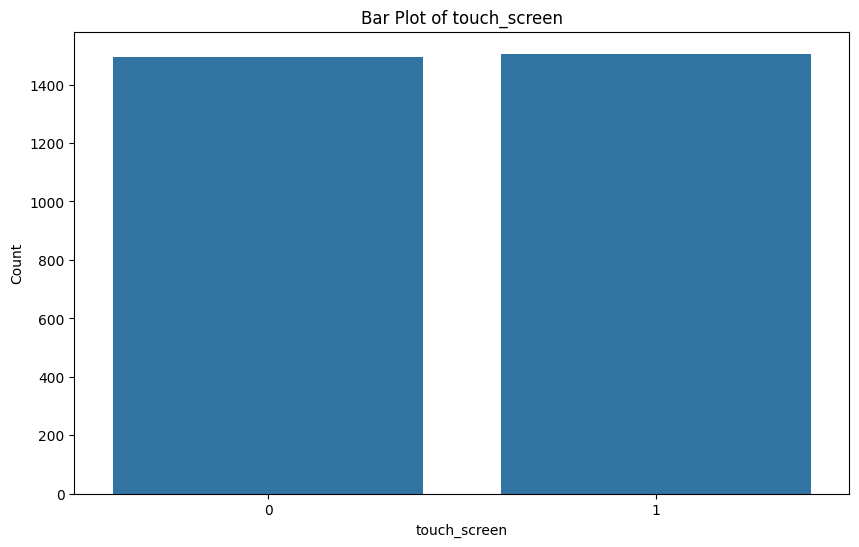

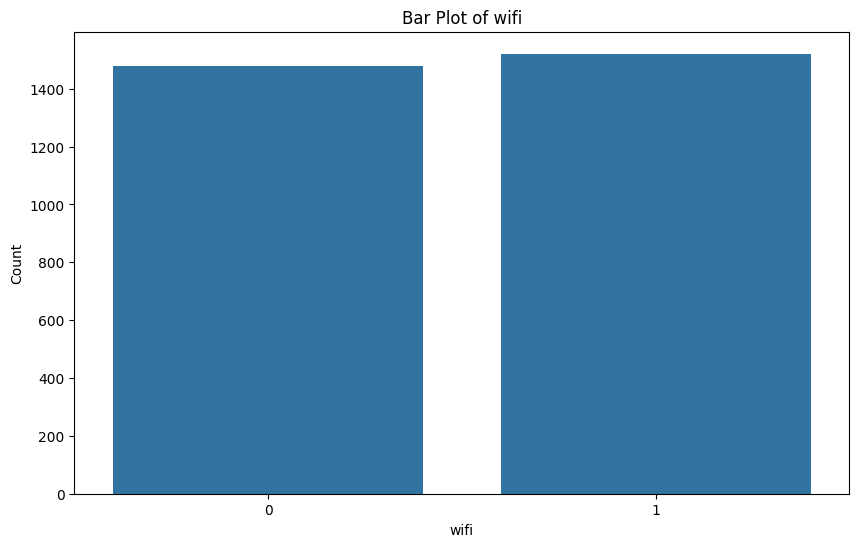

In [41]:
categories = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

for feature in categories:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[feature])
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Correlation Analysis

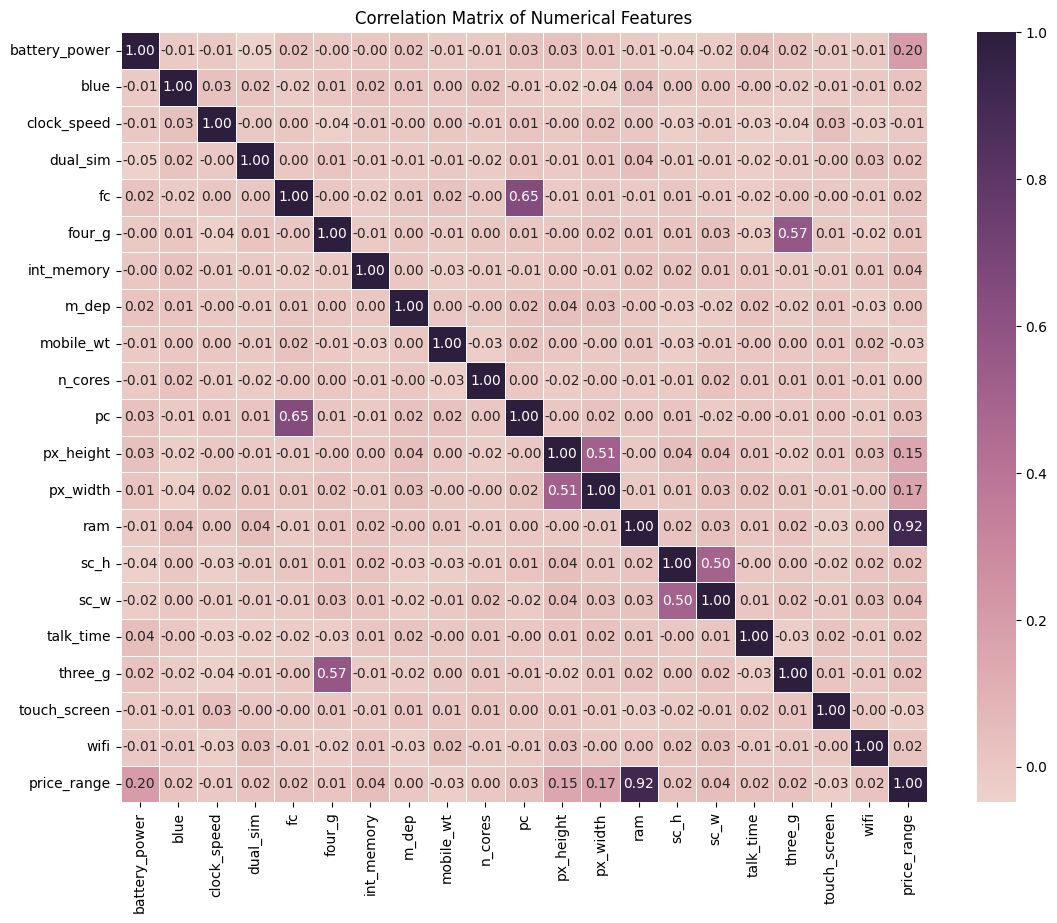

In [47]:
# Plot the heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(correlation, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Drop the highly correlated features

In [48]:
threshold = 0.8
to_drop = set()

for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > threshold:
            colname = correlation.columns[i]
            to_drop.add(colname)

# Drop the highly correlated features
df_reduced = df.drop(columns=to_drop)
df_reduced


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
2996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
2997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
2998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


Add Price range to correlation matrix

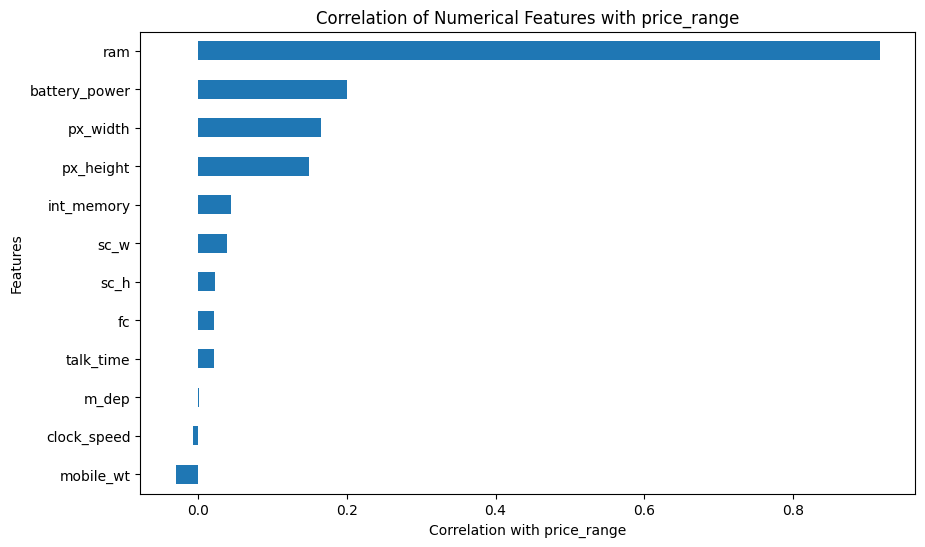

In [49]:
target_correlation = df[num_features + ['price_range']].corr()['price_range'].drop('price_range')

# Plot the target correlation
plt.figure(figsize=(10, 6))
target_correlation.sort_values().plot(kind='barh')
plt.title('Correlation of Numerical Features with price_range')
plt.xlabel('Correlation with price_range')
plt.ylabel('Features')
plt.show()


# Apply PCA for viewing the Clusters or Patterns

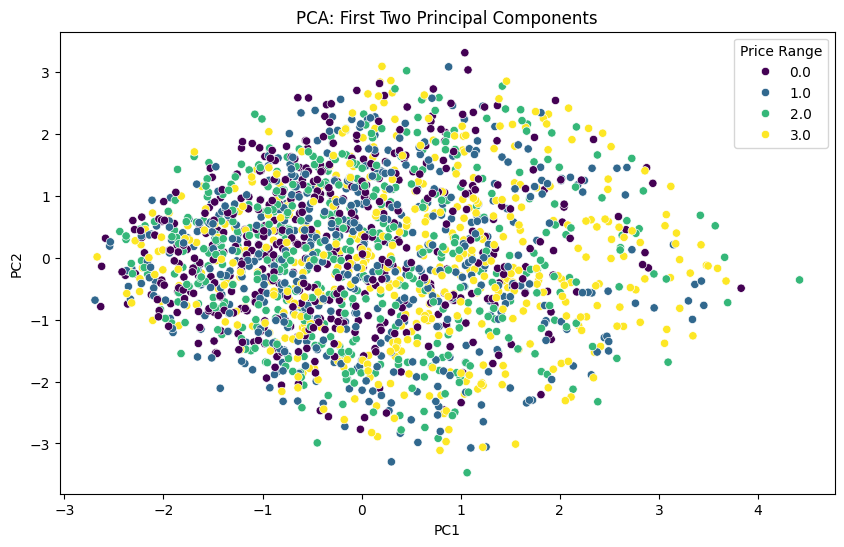

Explained variance ratio: [0.13102514 0.12229384]


In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_features])

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['price_range'] = df['price_range'].values

# Plot the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='price_range', data=pca_df, palette='viridis')
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Price Range')
plt.show()

# Explained variance ratio
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')


# Feature Selection

**Recursive Feature Elimination (RFE)**
 Iteratively remove the least important features and build the model to find the best subset.

In [51]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = train.drop('price_range', axis=1)
y = train['price_range']

model = RandomForestClassifier(n_estimators=100, random_state=0)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Get the ranking of features
ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_})
selected_features = ranking[ranking['Ranking'] == 1]['Feature']
print(f'Selected features: {selected_features.tolist()}')


Selected features: ['battery_power', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [71]:
selected_features

0     battery_power
6        int_memory
8         mobile_wt
10               pc
11        px_height
12         px_width
13              ram
14             sc_h
15             sc_w
16        talk_time
Name: Feature, dtype: object

These features will be used in the Model development